In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'DESCR', 'feature_names', 'target'])

In [4]:
#diabetes_X = diabetes.data[:, np.newaxis, 2] # Usar apenas uma variavel( : significa todas as linhas, e o np.newaxis é pra transformar em colunas)
diabetes_X = diabetes.data
diabetes_y = diabetes.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                                        diabetes_X,
                                        diabetes_y, 
                                        test_size=0.25, 
                                        random_state=1)

In [6]:
#lm = linear_model.LinearRegression() # Tentar utilizar RandomForestRegressor() -> Ver so com uma feature e com todas
lm = RandomForestRegressor(n_estimators=20)

In [7]:
lm.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
#print("Coefficients: \n", lm.coef_)

In [9]:
#cross_val_score?

In [10]:
cv_score = cross_val_score(lm, X_train, y_train, cv=5)
cv_score

array([ 0.07338698,  0.43959853,  0.34241028,  0.55118282,  0.56285924])

In [11]:
cv_score_train_mean = np.mean(cv_score)
cv_score_train_mean

0.39388756925084117

In [12]:
y_train_pred_cv = cross_val_predict(lm, X_train, y_train, cv=5)

In [13]:
validation_mse = mean_squared_error(y_train, y_train_pred_cv)
print("Mean squared error: %.2f"
     % mean_squared_error(y_train, y_train_pred_cv))

Mean squared error: 3504.63


In [14]:
validation_r2_score = r2_score(y_train, y_train_pred_cv)
print("Variance Score: %.2f"
     % r2_score(y_train, y_train_pred_cv))

Variance Score: 0.43


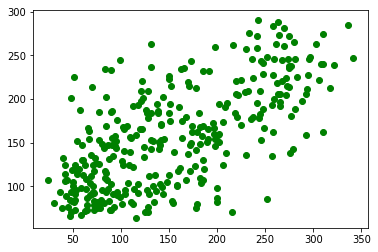

In [15]:
plt.scatter(y_train, y_train_pred_cv, color = "green")
plt.show()

In [16]:
#plt.scatter(X_train, y_train, color = "green")
#plt.scatter(X_train, y_train_pred_cv, color = "blue")
#plt.show()

In [17]:
y_test_pred = lm.predict(X_test)

In [18]:
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error: %.2f"
     % mean_squared_error(y_test, y_test_pred))

Mean squared error: 4051.62


In [19]:
test_r2_score = r2_score(y_test, y_test_pred)
print("Variance Score: %.2f"
     % r2_score(y_test, y_test_pred))

Variance Score: 0.22


In [20]:
#plt.scatter(X_test, y_test, color = "green")
#plt.plot(X_test, y_test_pred, color = "blue", linewidth=2)
#plt.show()

In [21]:
comparison = {"Validation" : [validation_mse, validation_r2_score],
              "Test" : [test_mse, test_r2_score]}
pd.DataFrame(comparison, index = ["MSE Score", "R2 Score"])

,Test,Validation
MSE Score,4051.622860,3504.627190
R2 Score,0.223999,0.430913
